In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv("C:/Users/ARAVINDH/Downloads/Company_Data.csv")

In [3]:
df.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes


In [5]:
df.loc[df.Sales >=8.5,'sales']= 'high'
df.loc[df.Sales <8.5,'sales']= 'low'

In [6]:
df.drop('Sales',1,inplace=True)

In [7]:
df.head(3)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,113,35,10,269,80,Medium,59,12,Yes,Yes,high


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompPrice    400 non-null    int64 
 1   Income       400 non-null    int64 
 2   Advertising  400 non-null    int64 
 3   Population   400 non-null    int64 
 4   Price        400 non-null    int64 
 5   ShelveLoc    400 non-null    object
 6   Age          400 non-null    int64 
 7   Education    400 non-null    int64 
 8   Urban        400 non-null    object
 9   US           400 non-null    object
 10  sales        400 non-null    object
dtypes: int64(7), object(4)
memory usage: 34.5+ KB


In [16]:
df.sales.value_counts()

low     257
high    143
Name: sales, dtype: int64

In [17]:
df.ShelveLoc.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [18]:
df.dtypes

CompPrice       int64
Income          int64
Advertising     int64
Population      int64
Price           int64
ShelveLoc      object
Age             int64
Education       int64
Urban          object
US             object
sales          object
dtype: object

In [ ]:
#Here ShelveLoc,Urban,US,sales columns are categorical.So Convert all four columns datatypes

In [26]:
label_encoder = preprocessing.LabelEncoder() 
df['US']= label_encoder.fit_transform(df['US'])
df['Urban']= label_encoder.fit_transform(df['Urban']) 
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc']) 
df['sales']= label_encoder.fit_transform(df['sales']) 

In [27]:
df.head(3)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0


In [28]:
colnames = list(df.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'sales']

In [29]:
x=colnames[0:10]
y=colnames[10]

In [ ]:
#Train and Test spliting

In [46]:
train,test=train_test_split(df,test_size = 0.25)

In [ ]:
#Decision Tree 

In [47]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(train[x],train[y])

DecisionTreeClassifier(criterion='entropy')

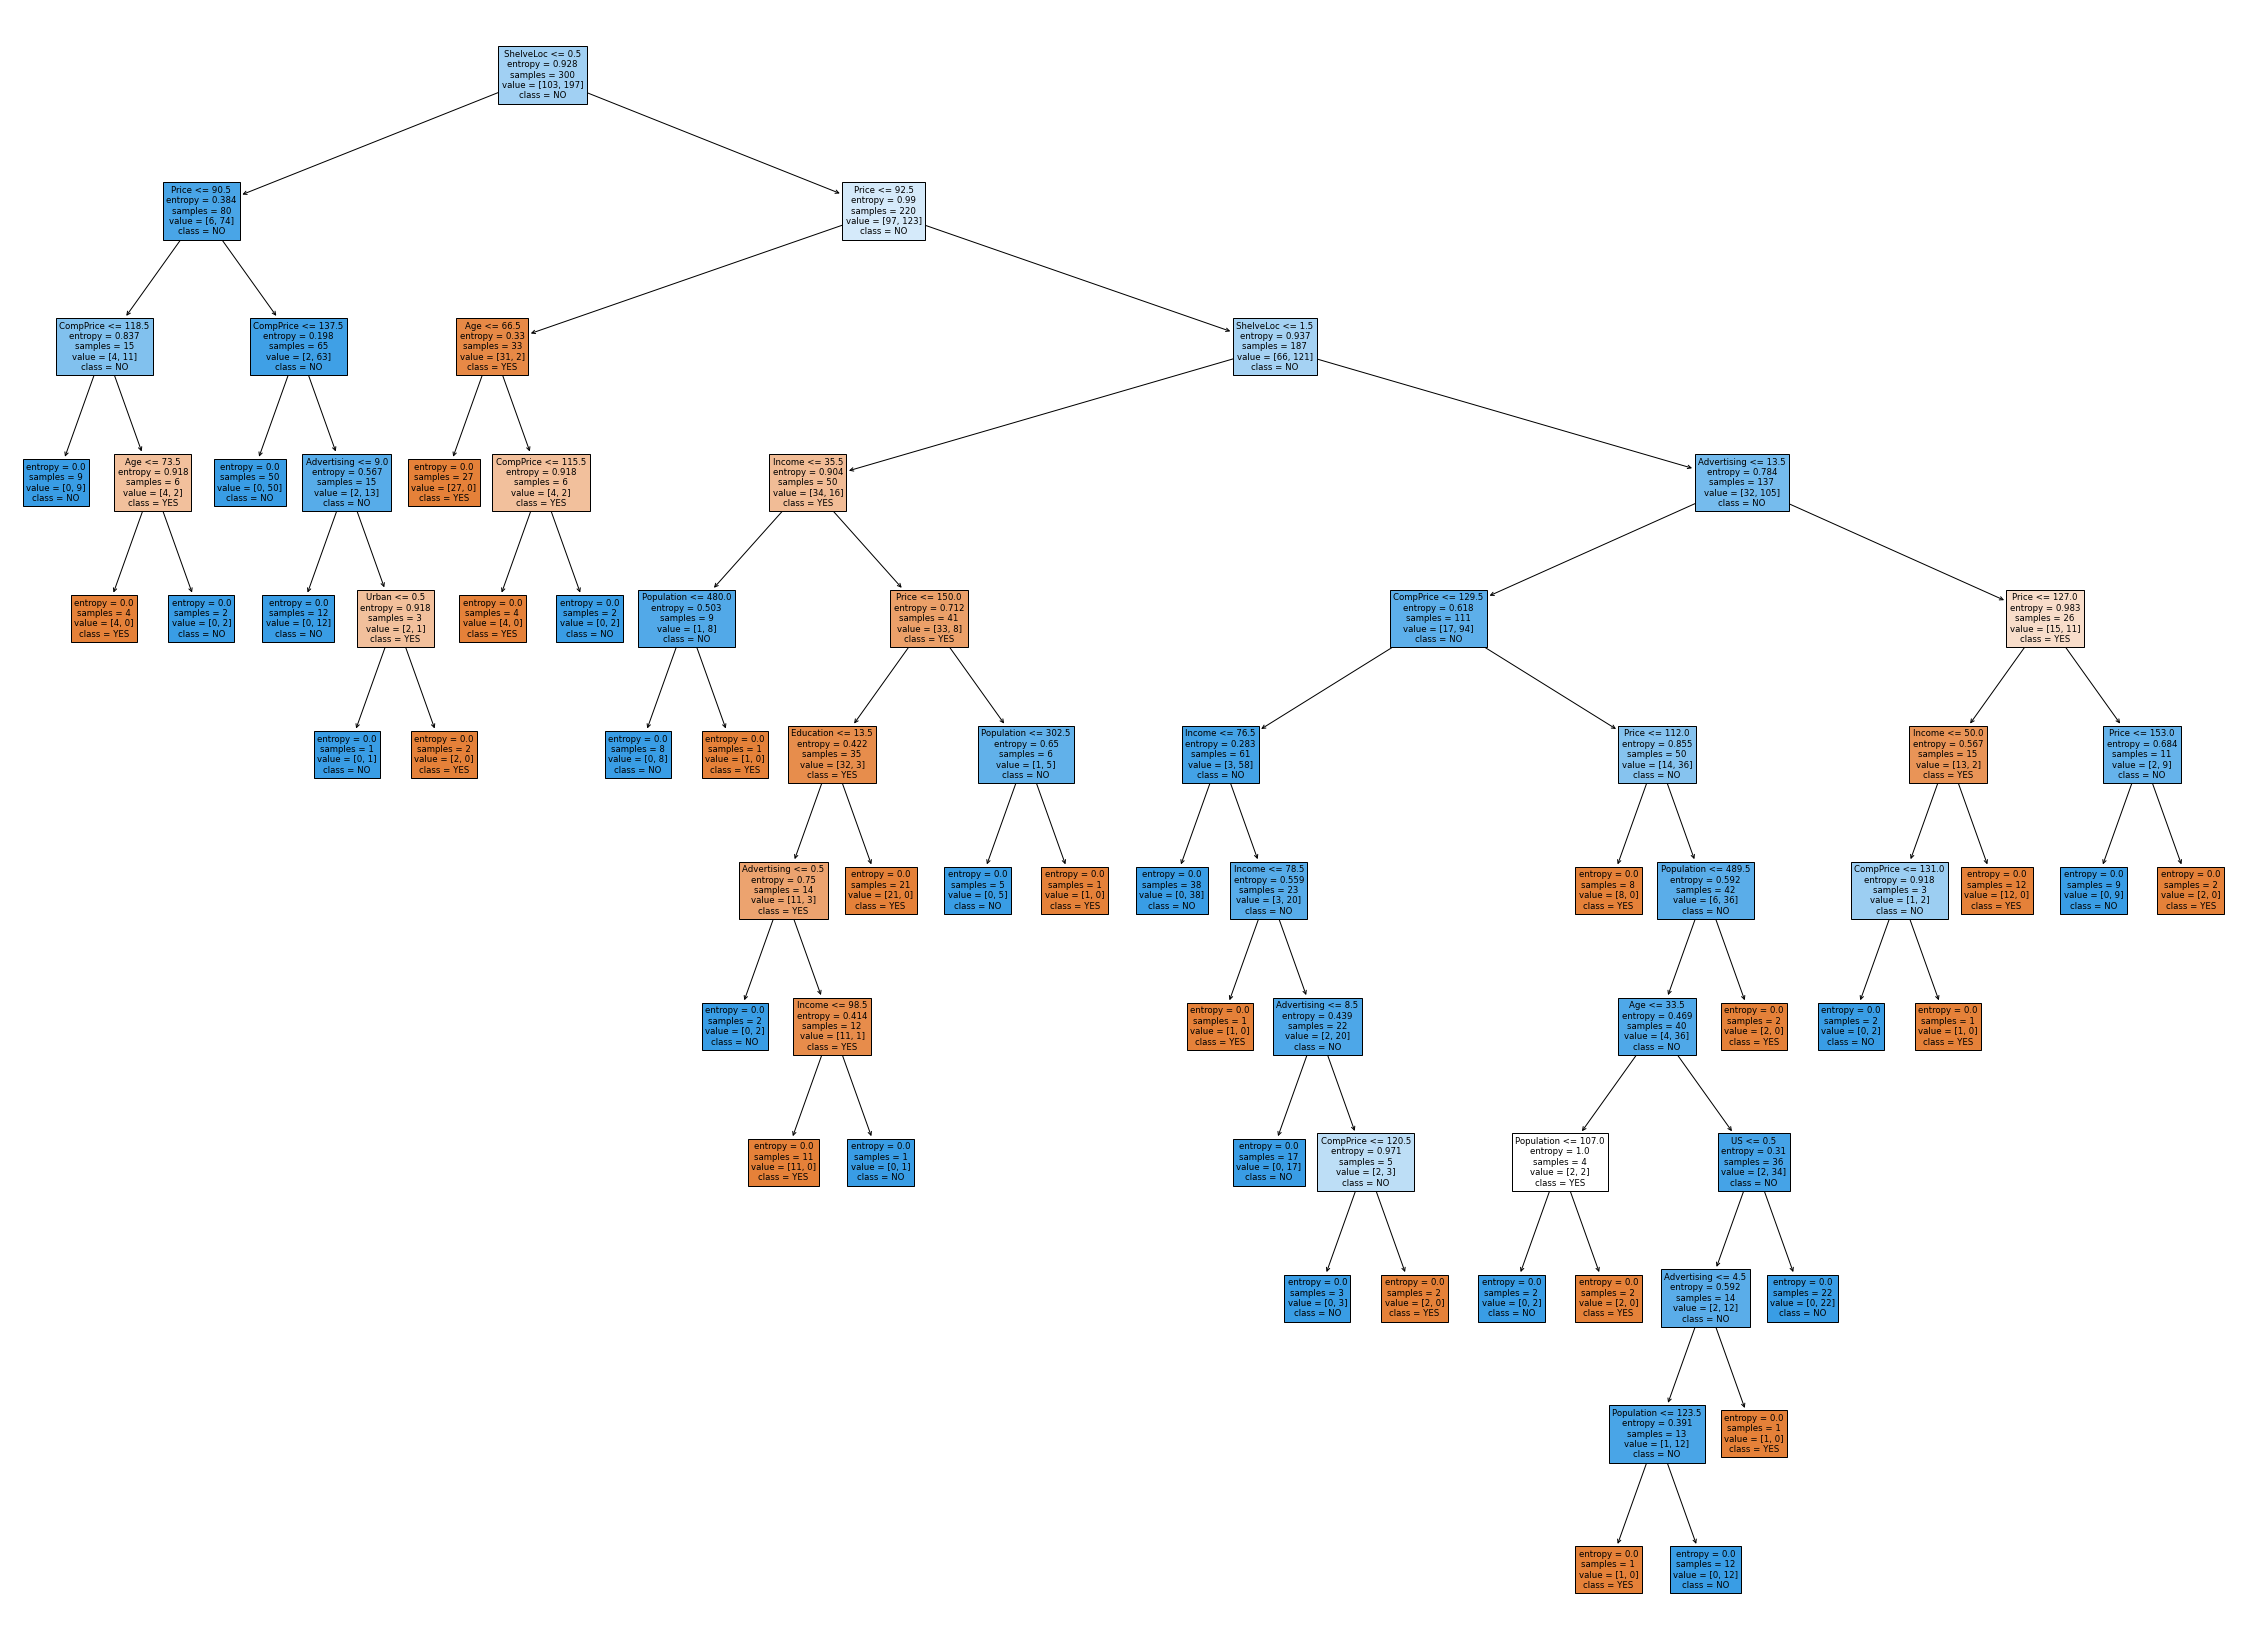

In [55]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US','sales']
cn=['YES','NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,30))
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [77]:
pred=model.predict(test[x])
pred

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1])

In [79]:
pd.crosstab(test[y],pred)

col_0,0,1
sales,,
0,27,13
1,15,45
